# Predicting wine type (Red/White) and wine quality (Poor/low):

## Capstone Project for Data Incubator

### Notebook by Debisree Ray


### 1.  The Problem:

Wine is an alcoholic beverage made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol, carbon dioxide, and heat. It is a pleasant tasting alcoholic beverage, loved cellebrated . It will definitely be interesting to analyze the physicochemical attributes of wine and understand their relationships and significance with wine quality and types classifications. To do this, We will proceed according to the standard Machine Learning and data mining workflow models like the CRISP-DM model, mainly for:

Predict if each wine sample is a red or white wine.
Predict the quality of each wine sample, which can be low, medium, or high.
The dataset are related to red and white variants of the "Vinho Verde" wine. Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer).

### 2. The Client: 

The client would be any winery or wine company or wine enthusiast, who wants to understand the characteristics of good wine.

### 3. The Data:

This dataset is public available for research purposes only, for more information, read Cortez et al., 2009. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)

This problem was enlisted as a Kaggle Competetion. I have downloaded the data from the following public link.

https://www.kaggle.com/rajyellow46/wine-quality#winequalityN.csv

The Data colums are as follows:

* **fixed acidity:** 
* **volatile acidity:**
* **citric acid:**
* **residual sugar:**
* **chlorides:**
* **free sulfur dioxide:**
* **total sulfur dioxide:**
* **density:**
* **pH:**
* **sulphates:**
* **alcohol:**
* **quality:**
* **Type:**



In [15]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [7]:
df= pd.read_csv('winequalityN.csv')
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [10]:
df.shape

(6497, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### 4. Exploratory Data Analysis:
### 4.1 Type:

This is the wine type in the dataset.

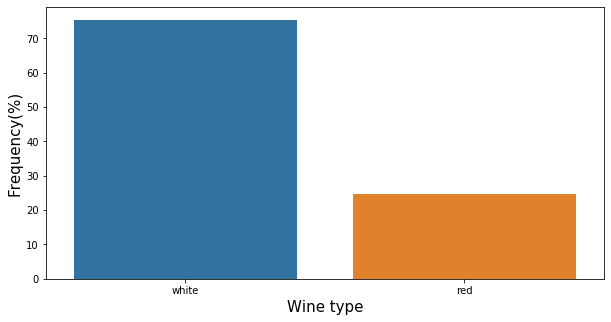

In [39]:
wine=df['type'].value_counts(normalize=True)

#Visually:
plt.figure(figsize=(10,5))
_=sns.barplot(wine.index,wine.values*100)
plt.xlabel('Wine type',fontsize=15)
plt.ylabel('Frequency(%)',fontsize=15)
plt.savefig('1.png')
plt.show()

* The data is imbalanced.
* 75% of the entire data is 'White wine'
* 25% is the 'Red wine'.

### 4.2 fixed acidity:

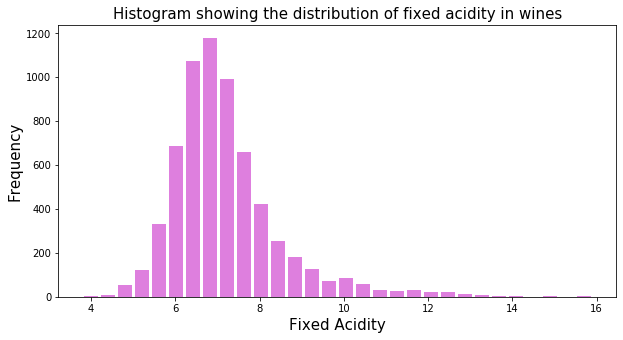

In [40]:
#Histogram:

plt.figure(figsize=(10,5))
_=plt.hist(df['fixed acidity'],bins=30,alpha=0.5, rwidth=0.85,color='m')
plt.xlabel('Fixed Acidity',fontsize=15)
plt.ylabel ('Frequency',fontsize=15)
plt.title('Histogram showing the distribution of fixed acidity in wines',fontsize=15)
plt.savefig('1a.png')
plt.show()

In [34]:
#Descriptive Statistics:

print(df['fixed acidity'].max())
print(df['fixed acidity'].min())
print(df['fixed acidity'].mean())
print(df['fixed acidity'].std())

15.9
3.8
7.2165793124710795
1.2967498565264803


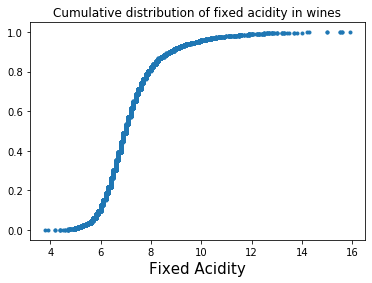

In [38]:

# ECDF:
def ecdf(array):
    """Compute ECDF for 1D array of measurement data."""
    # sort array to use as the x axis
    x = np.sort(array)    
    # use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    return x,y

# Distribution of average user ratings

x,y = ecdf(df['fixed acidity'])
plt.plot(x, y, marker = '.', linestyle='none')
plt.xlabel('Fixed Acidity',fontsize=15)
#plt.ylabel('Frequency')
plt.title('Cumulative distribution of fixed acidity in wines')
plt.savefig('1b.png')
plt.show()